In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

import itertools

import copy

In [3]:
data = pd.read_csv('Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Data is skewed

<AxesSubplot:xlabel='Dependents', ylabel='count'>

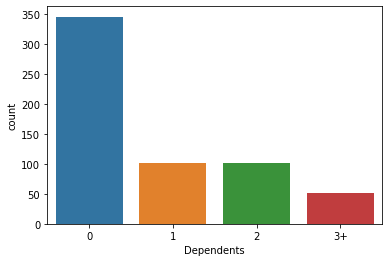

In [8]:
sns.countplot(data = data, x = 'Dependents')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

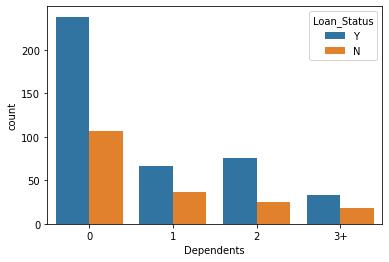

In [13]:
sns.countplot(data = data, x = 'Dependents', hue = 'Loan_Status')

### Number of Dependants and how it affects loan status

In [9]:
dep_status = data.groupby(['Dependents', 'Loan_Status']).size().reset_index().rename(columns={0: 'Frequencies'})
dep_status = dep_status.pivot_table(index='Loan_Status', columns='Dependents')
dep_status

Frequencies            
Dependents            0   1   2  3+
Loan_Status                        
N                   107  36  25  18
Y                   238  66  76  33

In [10]:
chi2_contingency(dep_status)

(3.158339770698263,
 0.3678506740863211,
 3,
 array([[107.12854758,  31.67278798,  31.36227045,  15.83639399],
        [237.87145242,  70.32721202,  69.63772955,  35.16360601]]))

Dependants does not affect the loan status

### Does gender affect the loan status?

In [11]:
gen_status = data.groupby(['Gender', 'Loan_Status']).size().reset_index().rename(columns = {0: 'Frequencies'})
gen_status = gen_status.pivot_table(index = 'Loan_Status', columns = 'Gender')
gen_status

Frequencies     
Gender           Female Male
Loan_Status                 
N                    37  150
Y                    75  339

In [12]:
chi2_contingency(gen_status)

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569, 152.15141431],
        [ 77.15141431, 336.84858569]]))

The gender does not affect the loan status

### Marraige and Loan Status

In [13]:
mar_status = data.groupby(['Loan_Status', 'Married']).size().reset_index().rename(columns = {0: 'Frequencies'})
mar_status = mar_status.pivot_table(index = 'Loan_Status', columns = 'Married')
mar_status

Frequencies     
Married              No  Yes
Loan_Status                 
N                    79  113
Y                   134  285

In [14]:
chi2_contingency(mar_status)

(4.475019348315097,
 0.03439381301579988,
 1,
 array([[ 66.93289689, 125.06710311],
        [146.06710311, 272.93289689]]))

In [15]:
mar_status['Sum'] = mar_status.sum(axis = 1)
mar_status.iloc[0,0], mar_status.iloc[0,1] = mar_status.iloc[0,0]/mar_status.iloc[0,2] * 100, mar_status.iloc[0,1]/mar_status.iloc[0,2] * 100
mar_status.iloc[1,0], mar_status.iloc[1,1] = mar_status.iloc[1,0]/mar_status.iloc[1,2] * 100, mar_status.iloc[1,1]/mar_status.iloc[1,2] * 100
mar_status

Frequencies             Sum
Married              No        Yes     
Loan_Status                            
N             41.145833  58.854167  192
Y             31.980907  68.019093  419

Being eligible for loan is affected by marital status. Married people are more likely to be eligble than unmarried people. <br>
Inegibility of loan status however is not affected by marital status

Marital Status does affect the loan status

### Education and Loan Status

In [19]:
edu_status = data.groupby(['Loan_Status', 'Education']).size().reset_index().rename(columns = {0: 'Frequencies'})
edu_status = edu_status.pivot_table(index = 'Loan_Status', columns = 'Education')
edu_status

Frequencies             
Education      Graduate Not Graduate
Loan_Status                         
N                   140           52
Y                   340           82

In [17]:
chi2_contingency(edu_status)

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987,  41.90228013],
        [329.90228013,  92.09771987]]))

Education does affect the loan status

In [18]:
edu_status['Sum'] = edu_status.sum(axis = 1)
edu_status.iloc[0,0], edu_status.iloc[0,1] = edu_status.iloc[0,0]/edu_status.iloc[0,2] * 100, edu_status.iloc[0,1]/edu_status.iloc[0,2] * 100
edu_status.iloc[1,0], edu_status.iloc[1,1] = edu_status.iloc[1,0]/edu_status.iloc[1,2] * 100, edu_status.iloc[1,1]/edu_status.iloc[1,2] * 100
edu_status

Frequencies               Sum
Education      Graduate Not Graduate     
Loan_Status                              
N             72.916667    27.083333  192
Y             80.568720    19.431280  422

For those whose loan status has been approved, a higher % are graduates when compared to for Loan status not approved status

In [20]:
edu_status.loc['Sum', : ] = edu_status.sum()
edu_status.iloc[0,0], edu_status.iloc[1,0] = edu_status.iloc[0,0]/edu_status.iloc[2,0] * 100, edu_status.iloc[1,0]/edu_status.iloc[2,0] * 100
edu_status.iloc[0,1], edu_status.iloc[1,1] = edu_status.iloc[0,1]/edu_status.iloc[2,1] * 100, edu_status.iloc[1,1]/edu_status.iloc[2,1] * 100
edu_status

Frequencies             
Education      Graduate Not Graduate
Loan_Status                         
N             29.166667     38.80597
Y             70.833333     61.19403
Sum          480.000000    134.00000

### Self Employeed and Loan Status

In [72]:
emp_status = data.groupby(['Loan_Status', 'Self_Employed']).size().reset_index().rename(columns = {0: 'Frequencies'})
emp_status = emp_status.pivot_table(index = 'Loan_Status', columns = 'Self_Employed')
emp_status

Frequencies    
Self_Employed          No Yes
Loan_Status                  
N                     157  26
Y                     343  56

In [18]:
chi2_contingency(emp_status)

(0.0,
 1.0,
 1,
 array([[157.21649485,  25.78350515],
        [342.78350515,  56.21649485]]))

In [73]:
emp_status['Sum'] = emp_status.sum(axis = 1)
emp_status.iloc[0,0], emp_status.iloc[0,1] = emp_status.iloc[0,0]/emp_status.iloc[0,2] * 100, emp_status.iloc[0,1]/emp_status.iloc[0,2] * 100
emp_status.iloc[1,0], emp_status.iloc[1,1] = emp_status.iloc[1,0]/emp_status.iloc[1,2] * 100, emp_status.iloc[1,1]/emp_status.iloc[1,2] * 100
emp_status

Frequencies             Sum
Self_Employed          No        Yes     
Loan_Status                              
N               85.792350  14.207650  183
Y               85.964912  14.035088  399

In [71]:
emp_status.loc['Sum', : ] = emp_status.sum()
emp_status.iloc[0,0], emp_status.iloc[1,0] = emp_status.iloc[0,0]/emp_status.iloc[2,0] * 100, emp_status.iloc[1,0]/emp_status.iloc[2,0] * 100
emp_status.iloc[0,1], emp_status.iloc[1,1] = emp_status.iloc[0,1]/emp_status.iloc[2,1] * 100, emp_status.iloc[1,1]/emp_status.iloc[2,1] * 100
emp_status

Frequencies           
Self_Employed          No        Yes
Loan_Status                         
N                    31.4  31.707317
Y                    68.6  68.292683
Sum                 500.0  82.000000

### Property Area and Loan Status

In [75]:
prop_area_status = data.groupby(['Loan_Status', 'Property_Area']).size().reset_index().rename(columns = {0: 'Frequencies'})
prop_area_status = prop_area_status.pivot_table(index = 'Loan_Status', columns = 'Property_Area')
prop_area_status

Frequencies                
Property_Area       Rural Semiurban Urban
Loan_Status                              
N                      69        54    69
Y                     110       179   133

In [20]:
chi2_contingency(prop_area_status)

(12.297623130485677,
 0.0021360187811644915,
 2,
 array([[ 55.97394137,  72.85993485,  63.16612378],
        [123.02605863, 160.14006515, 138.83387622]]))

Marraige, Educaion, Self-Employed and Property Area does affect the loan status

In [77]:
prop_area_status['Sum'] = prop_area_status.sum(axis = 1)
prop_area_status.iloc[0,0], prop_area_status.iloc[0,1], prop_area_status.iloc[0,2] = prop_area_status.iloc[0,0]/prop_area_status.iloc[0,3] * 100, prop_area_status.iloc[0,1]/prop_area_status.iloc[0,3] * 100, prop_area_status.iloc[0,2]/prop_area_status.iloc[0,3] * 100
prop_area_status.iloc[1,0], prop_area_status.iloc[1,1], prop_area_status.iloc[1,2] = prop_area_status.iloc[1,0]/prop_area_status.iloc[1,3] * 100, prop_area_status.iloc[1,1]/prop_area_status.iloc[1,3] * 100, prop_area_status.iloc[1,2]/prop_area_status.iloc[1,3] * 100
prop_area_status

Frequencies                        Sum
Property_Area       Rural  Semiurban      Urban     
Loan_Status                                         
N               35.937500  28.125000  35.937500  192
Y               26.066351  42.417062  31.516588  422

42% of loan status applicable is for semiurban

## Numerical Columns and Loan Status

In [21]:
data.select_dtypes(exclude='object').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

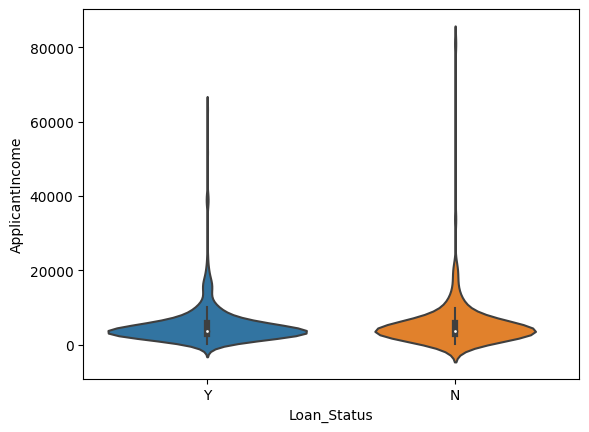

In [22]:
sns.violinplot(data=data, x = 'Loan_Status', y = 'ApplicantIncome')

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

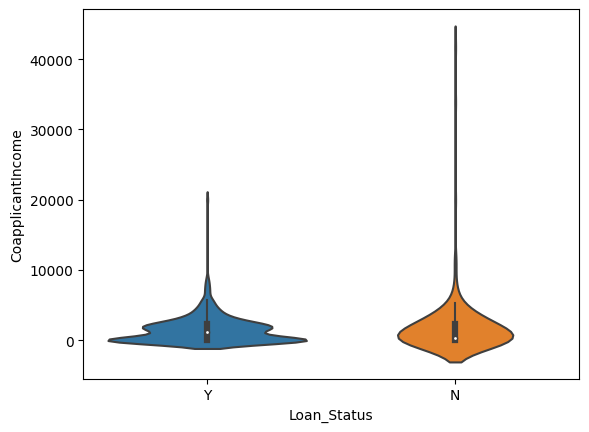

In [23]:
sns.violinplot(data=data, x = 'Loan_Status', y = 'CoapplicantIncome')

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

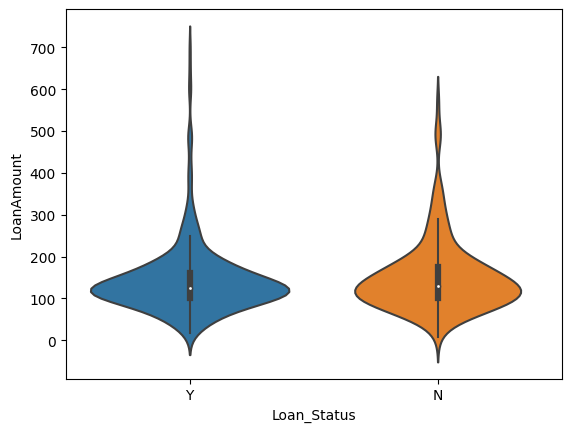

In [24]:
sns.violinplot(data=data, x = 'Loan_Status', y = 'LoanAmount')

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

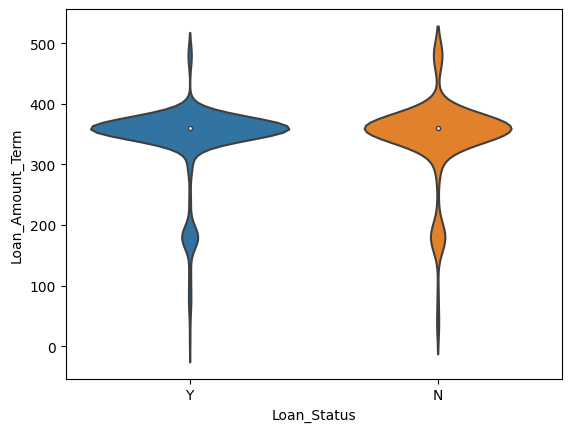

In [26]:
sns.violinplot(data=data, x = 'Loan_Status', y = 'Loan_Amount_Term')

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

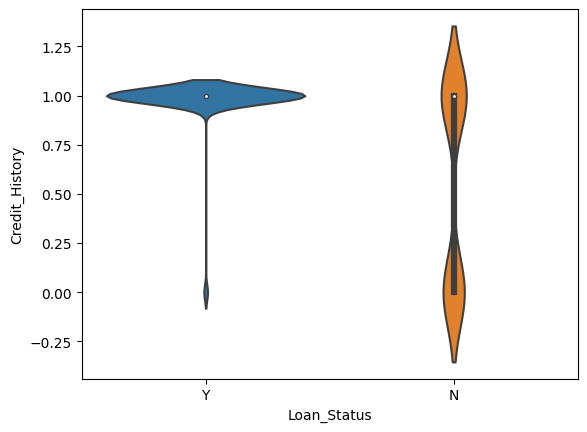

In [27]:
sns.violinplot(data=data, x = 'Loan_Status', y = 'Credit_History')

### Let's check how the dependant variables affect each other

In [30]:
X = copy.deepcopy(data)
y = X.pop('Loan_Status')

In [32]:
cat_df = X.select_dtypes('object')
cat_df.set_index('Loan_ID', drop = True, inplace = True)
cat_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001002,Male,No,0,Graduate,No,Urban
LP001003,Male,Yes,1,Graduate,No,Rural


In [33]:
cols = cat_df.columns
combs = list(itertools.combinations(cols, 2))
for comb in combs:
    cat1_df = X.groupby([comb[0], comb[1]]).size().reset_index().rename(columns = {0: 'Frequencies'})
    cat1_df = cat1_df.pivot_table(index = comb[0], columns = comb[1])
    if chi2_contingency(cat1_df)[1] < 0.05:
        print(f'{comb} has p-value {chi2_contingency(cat1_df)[1]} and is therefore interdependant')

('Gender', 'Married') has p-value 4.3247055472659236e-19 and is therefore interdependant
('Gender', 'Dependents') has p-value 0.0002409880921169245 and is therefore interdependant
('Gender', 'Property_Area') has p-value 0.018023173625175064 and is therefore interdependant
('Married', 'Dependents') has p-value 1.1785811086969576e-17 and is therefore interdependant


In [53]:
cat1_df = cat_df.groupby(['Gender', 'Married']).size().reset_index().rename(columns = {0: 'Frequencies'})
cat1_df = cat1_df.pivot_table(index = 'Gender', columns = 'Married')
cat1_df['Sum'], cat1_df.loc['Sum, :'] = cat1_df.sum(axis = 1), cat1_df.sum()
cat1_df.iloc[0,0], cat1_df.iloc[0,1] = (cat1_df.iloc[0,0]/cat1_df.iloc[0,2]) * 100, (cat1_df.iloc[0,1]/cat1_df.iloc[0,2]) * 100
cat1_df.iloc[1,0], cat1_df.iloc[1,1] = (cat1_df.iloc[1,0]/cat1_df.iloc[1,2]) * 100, (cat1_df.iloc[1,1]/cat1_df.iloc[1,2]) * 100
cat1_df

Frequencies                Sum
Married          No         Yes       
Gender                                
Female    72.072072   27.927928  111.0
Male      26.694045   73.305955  487.0
Sum, :   210.000000  388.000000    NaN

More % of women are unmarried (72%) and more % of men are married (73%)

In [82]:
cat1_df = cat_df.groupby(['Gender', 'Dependents']).size().reset_index().rename(columns = {0: 'Frequencies'})
cat1_df = cat1_df.pivot_table(index = 'Gender', columns = 'Dependents')
cat1_df['Sum'], cat1_df.loc['Sum, :'] = cat1_df.sum(axis = 1), cat1_df.sum()
cat1_df.iloc[0,0], cat1_df.iloc[0,1], cat1_df.iloc[0,2], cat1_df.iloc[0,3] = (cat1_df.iloc[0,0]/cat1_df.iloc[0,4]) * 100, (cat1_df.iloc[0,1]/cat1_df.iloc[0,4]) * 100, (cat1_df.iloc[0,2]/cat1_df.iloc[0,4]) * 100, (cat1_df.iloc[0,3]/cat1_df.iloc[0,4]) * 100
cat1_df.iloc[1,0], cat1_df.iloc[1,1], cat1_df.iloc[1,2], cat1_df.iloc[1,3] = (cat1_df.iloc[1,0]/cat1_df.iloc[1,4]) * 100, (cat1_df.iloc[1,1]/cat1_df.iloc[1,4]) * 100, (cat1_df.iloc[1,2]/cat1_df.iloc[1,4]) * 100, (cat1_df.iloc[1,3]/cat1_df.iloc[1,4]) * 100
cat1_df

Frequencies                                      Sum
Dependents           0           1          2         3+       
Gender                                                         
Female       73.394495   17.431193   6.422018   2.752294  109.0
Male         54.088050   17.190776  19.287212   9.433962  477.0
Sum, :      338.000000  101.000000  99.000000  48.000000    NaN

In [84]:
cat1_df = cat_df.groupby(['Gender', 'Property_Area']).size().reset_index().rename(columns = {0: 'Frequencies'})
cat1_df = cat1_df.pivot_table(index = 'Gender', columns = 'Property_Area')
cat1_df['Sum'], cat1_df.loc['Sum, :'] = cat1_df.sum(axis = 1), cat1_df.sum()
cat1_df.iloc[0,0], cat1_df.iloc[0,1], cat1_df.iloc[0,2] = (cat1_df.iloc[0,0]/cat1_df.iloc[0,3]) * 100, (cat1_df.iloc[0,1]/cat1_df.iloc[0,3]) * 100, (cat1_df.iloc[0,2]/cat1_df.iloc[0,3]) * 100
cat1_df.iloc[1,0], cat1_df.iloc[1,1], cat1_df.iloc[1,2] = (cat1_df.iloc[1,0]/cat1_df.iloc[1,3]) * 100, (cat1_df.iloc[1,1]/cat1_df.iloc[1,3]) * 100, (cat1_df.iloc[1,2]/cat1_df.iloc[1,3]) * 100
cat1_df

Frequencies                            Sum
Property_Area       Rural   Semiurban       Urban       
Gender                                                  
Female          21.428571   49.107143   29.464286  112.0
Male            30.879346   35.173824   33.946830  489.0
Sum, :         175.000000  227.000000  199.000000    NaN

In [85]:
cat1_df = cat_df.groupby(['Married', 'Dependents']).size().reset_index().rename(columns = {0: 'Frequencies'})
cat1_df = cat1_df.pivot_table(index = 'Married', columns = 'Dependents')
cat1_df['Sum'], cat1_df.loc['Sum, :'] = cat1_df.sum(axis = 1), cat1_df.sum()
cat1_df.iloc[0,0], cat1_df.iloc[0,1], cat1_df.iloc[0,2], cat1_df.iloc[0,3] = (cat1_df.iloc[0,0]/cat1_df.iloc[0,4]) * 100, (cat1_df.iloc[0,1]/cat1_df.iloc[0,4]) * 100, (cat1_df.iloc[0,2]/cat1_df.iloc[0,4]) * 100, (cat1_df.iloc[0,3]/cat1_df.iloc[0,4]) * 100
cat1_df.iloc[1,0], cat1_df.iloc[1,1], cat1_df.iloc[1,2], cat1_df.iloc[1,3] = (cat1_df.iloc[1,0]/cat1_df.iloc[1,4]) * 100, (cat1_df.iloc[1,1]/cat1_df.iloc[1,4]) * 100, (cat1_df.iloc[1,2]/cat1_df.iloc[1,4]) * 100, (cat1_df.iloc[1,3]/cat1_df.iloc[1,4]) * 100
cat1_df

Frequencies                                       Sum
Dependents           0           1           2         3+       
Married                                                         
No           81.818182   11.004785    3.827751   3.349282  209.0
Yes          44.615385   20.256410   23.846154  11.282051  390.0
Sum, :      345.000000  102.000000  101.000000  51.000000    NaN

As expected the breakdown for non-married people has the largest % with no dependants at 81%. But what is unexpected is that the 0 dependents is the largest % for married people as well though at a smaller %.

<AxesSubplot:>

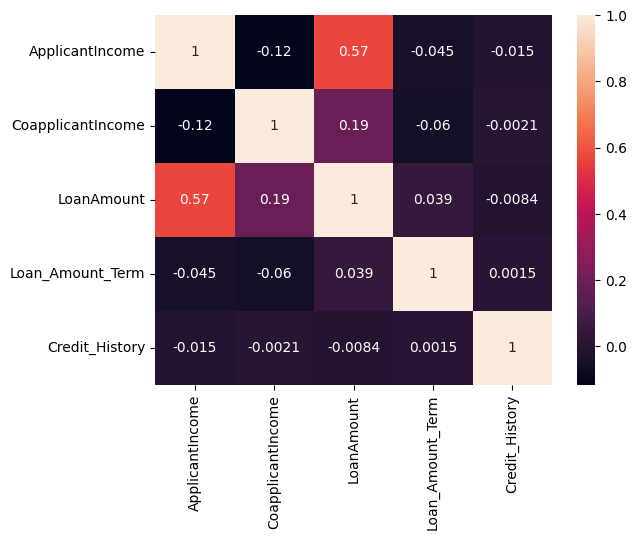

In [35]:
num_df = X.select_dtypes(exclude='object')
num_corr = num_df.corr()
sns.heatmap(num_corr, annot=True)